In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [18]:
alpha = 0.5; Re = 0.01; epsilon =0.1; Bo=epsilon; Ca=epsilon; Ma = 0; k = 1; Lambda = 0.1
N = 10;
r_list = np.linspace(alpha, 1, N); h = r_list[1]-r_list[0]



In [21]:
def w_0(r):
    return 1/4*(2*np.log(r/alpha)-(r**2-alpha**2))
def w_0_prime(r):
    return 1/2*(1/r-r)

In [32]:
matrix_a_continuity = np.zeros((N,N), dtype=complex)
matrix_b_continuity = np.zeros((N,N), dtype=complex)
matrix_p_continuity = np.zeros((N,N), dtype=complex)
matrix_a_continuity[0,0] = 1; # no_slip for u at the wall (a_0=0)
matrix_b_continuity[-1,0] =1; # no_slip for u at the wall (b_0=0)
for j, r in enumerate(r_list[1:-1]):
    matrix_a_continuity[j, j-1] = -1/2/h
    matrix_a_continuity[j,j] = 1/r
    matrix_a_continuity[j,j+1] = 1/2/h
    matrix_b_continuity[j,j] = 1j*k
matrix_continuity = np.concatenate([matrix_a_continuity, matrix_b_continuity, matrix_p_continuity], axis=1)

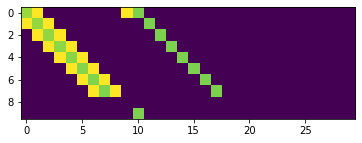

In [39]:
plt.imshow(np.abs(matrix_continuity)**(1/10))

In [35]:
matrix_a_rmom = np.zeros((N,N), dtype=complex)
matrix_b_rmom = np.zeros((N,N), dtype=complex)
matrix_p_rmom = np.zeros((N,N), dtype=complex)

for j, r in enumerate(r_list[1:-1]):
    matrix_a_rmom[j, j-1] = -1/2/h
    matrix_a_rmom[j,j] = 1/r
    matrix_a_rmom[j,j+1] = 1/2/h
    matrix_p_rmom[j,j] = 1j*k
matrix_continuity = np.concatenate([matrix_a_continuity, matrix_b_continuity, matrix_p_continuity], axis=1)